<a href="https://colab.research.google.com/github/JennyZhan165/A2-12840221-12659696/blob/master/ML_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2: Practical Machine Learning Project
## Group member: 12840221 Yunhan Zhan / 12659696 Chaoran Fu

### Github link: <>
### Youtube Video link:<https://www.youtube.com/watch?v=6kUn-R1DlB0&feature=youtu.be>
### Dataset link:  <https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/downloads/suicide-rates-overview-1985-to-2016.zip/1>

## 1. Introduction
### 1.1 Define problem

The dataset that we used for this project is called ‘Suicide Rates Overview 1985 to 2016’ from Kaggle. There are 12 columns totally: country, year, sex, age, suicides_no, population, suicides/100k pop, country-year, HDI for year, gdp_for_year, gdp_per_capita and generation. The main data mining problem that we found is to deal with predicting the feature of suicides_no which means the number of suicides under specific conditions. 

### 1.2 Discuss the Algorithm

Python will be the main language in the following processing to solve the problem. Colab will be the environment for us to implement machine learning project. Additionally, this report will use few machine learning software libraries, such as scikit-learn, np and panda.

There are different regressors that can be used to predict suicides_no, for instance, Decision Tree, Random Forest and Support Vector Regression. Eventually, we will compare the accuracy rate for each of the models in order to choose the most suitable model. Additionally, before we build each regressors, for prediction purpose, we are supposed to split the dataset into two parts, one is training data, and another is testing data. In this project, I will set 80% of the training data and 20% for the testing data as default.

The main purpose of this data mining project is to provide input columns that can correctly produce an output of suicides_no by using accurate regressors. However, few columns such as, 'HID for year' and 'country-year' are filtered from the processing because these columns are irrelevant values or have a huge number of missing values that won’t help us to predict the target value. After analysis this dataset, the input of the data mining projects will be country, year, sex, age, population, suicides_no, suicides/100k pop, generation, gdp_for_year and gdp_per_capita. Then, the suicides_no will be the output of the algorithm. In the following part, many data pre-processing steps were used to drop of those useless values and also fully preparation and transform before passing the dataset to models. Except from that, correlation is a method that was used to assist with checking how strong each relationship is between those features after preparation.

##2. Exploration


In [218]:
from google.colab import drive

drive.mount('/content/gdrive')
dataset = panda.read_csv( "/content/gdrive/My Drive/master.csv")
dataset=dataset.rename(columns={'suicides/100k pop':'suicides100kPop','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney',
                          'gdp_per_capita ($)':'GdpPerCapitalMoney'})
dataset.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,country,year,sex,age,suicides_no,population,suicides100kPop,country-year,HDIForYear,GdpForYearMoney,GdpPerCapitalMoney,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 2.1 Challenge

The challenges that we faced are quite a lot. On the one hand, heavily analytical work, because of the large size of the dataset and huge time span from 1985 to 2016. On the other hand, because the data mining problem is to predict the number of suicides (suicides_no), so we have to use methods to ignore these irrelevant columns, in order to get a high accuracy models. Apart from that, we are predicting numeric variable instead of categorical, so use regressors, not classifiers. Then, a few columns are supposed to transfer from categorical to numerical since the models only accept numbers.    

### 2.2 Data Description
#### 2.2.1 country

This column means the different names of countries where suicides happened. Moreover, this column is a categorical data type and it has 101 different categories. The highest records are Iceland, Austria, Netherlands and Mauritius categories (382 values), and the lowest record is Mongolia, only has 10 values. Because this column is a categorical value, we can’t use it as an input directly, so data type transferring is required for this column if it can help us to predict the target value. 


#### 2.2.2 year

This column is the year from 1985 to 2016 and it is a discrete data type. In 2009, it had the highest value of suicides and 2016 had the lowest value. Additionally, year can be used as an input for the processing of predicting the number of suicides. 



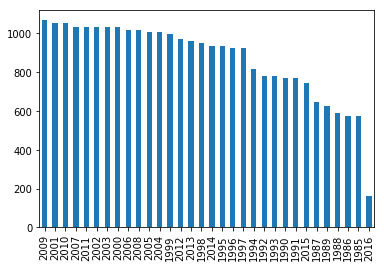

In [219]:
dataset['year'].value_counts().plot('bar')

#### 2.2.3 sex

This data is a categorical data type. In the dataset, it has 2 data values, male and female. We can see from the figure that the number of each gender are the same number: 13910.


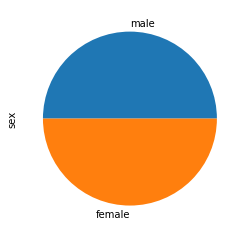

In [220]:
dataset['sex'].value_counts().plot('pie')

#### 2.2.4 age

This data is pretty complicated because it’s a range of the values and consists of numerical and categorical values. It was divided into 6 categories, 5-14 years, 15-24 years, 55-74 years, 25-34 years, 35-54 years and 75+ years. This data can be used in further processing as input and transformation is needed because it combines two data types. 


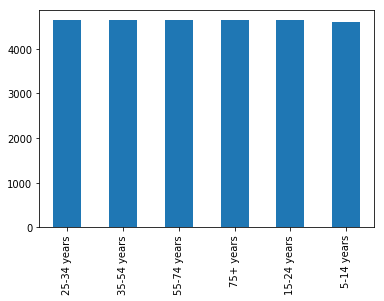

In [221]:
dataset['age'].value_counts().plot('bar')

#### 2.2.5 population

Population means the number of people in the country at the time of suicide in each period, and also it’s a numerical data. Additionally, because this data can be used to calculate the suicides_no and suicides rate, we consider it as an input data.

In [222]:
dataset['population'].describe()

count    2.782000e+04
mean     1.844794e+06
std      3.911779e+06
min      2.780000e+02
25%      9.749850e+04
50%      4.301500e+05
75%      1.486143e+06
max      4.380521e+07
Name: population, dtype: float64

#### 2.2.6 suicide_no

This column is a numerical data type and it records the number of suicides in a particular phase. The mean value is 242.57, and standard deviation of this column data is 902.048, the max number is 22338. Suicides_no is used for the output value of the data mining problem, and the accuracy after output are used to compare the accuracy in various algorithms.


In [223]:
dataset['suicides_no'].describe()

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

#### 2.2.7 suicides/100k pop

Suicides/100k pop(suicide rate) is a numerical data that is closely related to the population and the suicides_no. Furthermore, the mean of suicide rate is 12.816, and standard deviation is 18.96. Because the suicide rate directly affects the output value suicide number, it will be used as the input value of the data classification. 


In [224]:
dataset['suicides100kPop'].describe()

count    27820.000000
mean        12.816097
std         18.961511
min          0.000000
25%          0.920000
50%          5.990000
75%         16.620000
max        224.970000
Name: suicides100kPop, dtype: float64

#### 2.2.8 generation

This column has 6 different values and it is a categorical data type. Actually, generation is age-dependent value, G.I. Generation corresponds to people who were born between 1901 and 1927, and Silent corresponds to people who were born between 1925 and 1942 ,and Generation X corresponds to people who were born between 1960 and 1980, and Boomers are people who were born between 1946 and 1964, and Millennials are people who were born between 1980 and early 2000, finally, the mean of Generation Z are people who were born between mid1990 and 2000. Generation X has the most value that is 6408, and generation Z has the lowest value that is 1470.


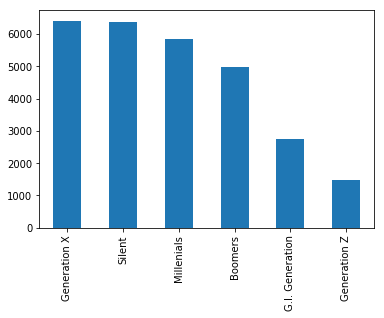

In [225]:
dataset['generation'].value_counts().plot('bar')

#### 2.2.9 gdp_for_year and gdp_per_capita 

Gdp_for_year describes Gross Domestic Product at the year of suicides and Gdp_per_captia describes Gross Domestic Product per capita at the year of suicides. These two sets of data are all numerical value. The total GDP can obtain the per capita GDP. Also, both of these data have a high positive correlation with suicides_no so that they are used as input values.


##3. Methodology
### 3.1 Data Pre-Processing
#### 3.1.1 Missing value
In this dataset, only ‘HDI for year’ has missing values, as shown below, which may reduce the accuracy of models. Because the number of missing values is more than half of the dataset (19,000) so we can’t do simple replacement of this column, then we decided to delete it to ensure the accuracy of models reached the exception.



In [0]:
#Check all the null value in the dataset
dataset.isnull().sum()
#Because there are more than 50% missing value of HDIForYear, so we drop this column
dataset = dataset.drop('HDIForYear',axis=1)

Furthermore, we give each category an integer value when the data type is categorical. For example, we give the number of the first country to 1, because only integer values can be used in regressions to do the data analytics, then delete the column and append the value to a new column called Transforcountry. Moreover, there are three more datas in the dataset, sex, age and generation, so we do the same conversion as the previous method. 


In [0]:
from sklearn.preprocessing import LabelEncoder

trans = LabelEncoder()
Transforcountry=trans.fit_transform(dataset['country'])
transMappings = {index: label for index, label in 
                  enumerate(trans.classes_)}
dataset['Transforcountry'] = Transforcountry
dataset.Transforcountry.unique()
#Removing the Category column as a column with numbers is appended
dataset = dataset.drop('country',axis=1)


In [0]:
#trans = LabelEncoder()
Transforsex=trans.fit_transform(dataset['sex'])
transMappings = {index: label for index, label in 
                  enumerate(trans.classes_)}
dataset['Transforsex'] = Transforsex
dataset.Transforsex.unique()
#Removing the Category column as a column with numbers is appended
dataset = dataset.drop('sex',axis=1)


In [0]:
#trans = LabelEncoder()
Transforage=trans.fit_transform(dataset['age'])
transMappings = {index: label for index, label in 
                  enumerate(trans.classes_)}
dataset['Transforage'] = Transforage
dataset.Transforage.unique()
#Removing the Category column as a column with numbers is appended
dataset = dataset.drop('age',axis=1)

In [0]:
#trans = LabelEncoder()
Transforgeneration=trans.fit_transform(dataset['generation'])
transMappings = {index: label for index, label in 
                  enumerate(trans.classes_)}
dataset['Transforgeneration'] = Transforgeneration
dataset.Transforgeneration.unique()
dataset = dataset.drop('generation',axis=1)

#### 3.1.2 Data Redundancy
If we look closer to the dataset, the column ‘country-year’ is the combination of ‘country’ and ‘year’, therefore we can ignore this column if we keep  ‘country’ and ‘year’ as inputs. 



In [0]:
#Country-year is similar to the combination of year and country, and becuase keep both, so can drop country-year
dataset = dataset.drop('country-year', axis = 1)

Additionally, there are more than 4000 columns of suicides_no and suicides rate (suicides100kPop). In order to enhance the accuracy of models, we can try to drop these rows which includes zero values.


In [0]:
# drop all the zero values in suicides_no
dataset = dataset[(dataset[['suicides_no','suicides100kPop']] != 0).all(axis=1)]

In addition to deal with columns, this dataset contains few unnecessary characters, for instance, the ‘,’ in the column of ‘GdpForYearMoney’, and Python cannot do statistics of these characters, so we use the following code to delete them.


In [0]:
#to delete the symbol in the dataset
checksymbol = dataset.columns
dataset[checksymbol]=dataset[checksymbol].replace({'\,':''}, regex = True)

#### 3.1.3 Data type conversion and appending the column
As we can see below, the initial datatype of the entire dataset, for few columns, the data type of country, age, sex and generation is object as default. Since models only accept numeric input, transfer the data type of these columns from category to numerical is necessary. 



In [234]:
#Check the datatype of each features
dataset.dtypes

year                    int64
suicides_no             int64
population              int64
suicides100kPop       float64
GdpForYearMoney        object
GdpPerCapitalMoney      int64
Transforcountry         int64
Transforsex             int64
Transforage             int64
Transforgeneration      int64
dtype: object

In [0]:
#change GdpForYearMoney to int
dataset['GdpForYearMoney'] = dataset.GdpForYearMoney.astype(int)

### 3.2 Implement Algorithm
#### 3.2.1 Decision Tree

Decision tree is a data analytics method that is used for regression analysis. Also, Decision tree always produce high accuracy and only accepts numeric input. In the previous section, we did data type conversion and data redundancy to gain the correct format of input data.

Firstly, we create two lists X and Y, and then we insert the whole prepared dataset without the data ‘suicides100kPop’ from X and then keep ‘suicides100kPop’ in list Y. In the next step, we partition the X and Y to X training, X testing, and Y training and Y testing, and we divide 20% data to testing data, and then use an internal random number generator to choose 100 data randomly. The below code shows the accuracy of the Decision Tree. The accuracy of Decision tree classifier is 99.9% 


In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

#Partitioning data
X= dataset.drop('suicides_no',axis=1)
Y= dataset['suicides_no']
# testing and training data of decision tree
dt_Xtraining, dt_Xtesting, dt_Ytraining, dt_Ytesting = train_test_split(X, Y, test_size=0.20, random_state = 100) 
model =  DecisionTreeRegressor(random_state= 100)
model.fit(dt_Xtraining, dt_Ytraining)
y_pred = model.predict(X) 

In [237]:
#Accuracy for Decision Tree
print("Accuracy for Decision Tree:", r2_score(Y, y_pred))

Accuracy for Decision Tree: 0.9991121948787185


#### 3.2.2 Random Forest

Random forest can also be used for regression analysis. Random forest model is a supervised learning method that creates a bunch of random trees that predict processes. Most parameters are similar to decision tree. In this classifier, Random forest model uses bootstrap sampling to select from the test set to make the deviation of the results smaller.

In the next step, we partition the X and Y to X training, X testing, and Y training and Y testing, and we give 20% data to testing data, and we use an internal random number generator to choose 100 data randomly. The below code shows the accuracy of the Random Forest Regressor. The accuracy of Random Forest is 68.6%


In [238]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression

rf_Xtrainging, rf_Xtesting, rf_Ytraining, rf_Ytesting = train_test_split(X, Y, test_size=0.20, random_state = 100) 
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(rf_Xtrainging, rf_Ytraining)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [239]:
print("Accuracy for Random-Forest:", r2_score(Y, regr.predict(X)))

Accuracy for Random-Forest: 0.6865944579475496


#### 3.2.3 Support Vector Regression

The last regression method that we used is Support Vector Regression (SVR) which can maintain the maximum margin of all significant features of the algorithm. We partitioned the X and Y to X training, X testing, and Y training and Y testing, and we give 20% data to testing data, so there are 5564 values in the testing dataset. We use all the parameters as default and the accuracy of Support Vector Regression is very bad.



In [240]:
X_training, X_testing, Y_training, Y_testing = train_test_split(X, Y, test_size=0.20, random_state = 100)
print('Training Features Shape:', X_training.shape)
print('Training Labels Shape:', Y_training.shape)
print('Testing Features Shape:', X_testing.shape)
print('Testing Labels Shape:', Y_testing.shape)
from sklearn.svm import SVR
import numpy as np

clf = SVR(gamma = 'scale', C = 50.0, epsilon = 0.5)
clf.fit(dt_Xtraining,dt_Ytraining)
y_pred = clf.predict(X)

Training Features Shape: (18831, 9)
Training Labels Shape: (18831,)
Testing Features Shape: (4708, 9)
Testing Labels Shape: (4708,)


In [241]:
print("Accuracy for SVR:", r2_score(Y, y_pred)) 

Accuracy for SVR: 0.1308785360039908


## 4. Evaluation

Decision Tree has disadvantages. Because it makes the optimal decision at every step, choosing the best result in a given step does not ensure that the prediction is always optimal. When any parameter changed, the accuracy of Decision Tree is still more than 90%.

In terms of Random Forest, many scholars believe that Random Forest model is powerful classification and regression analytics too, and this regressor is much more powerful than a single decision tree. Moreover, because the same features will be selected in many base trees, if we do not select features randomly, Random Forest will bring us insurmountable problems.

Support Vector Regression is related learning algorithms, analysing data, so it is also perfect for doing regression and classification analytics, but we can see through the result, this model may not be suitable for this data. 

In order to improve the accuracy of SVR, we modified the parameter. The accuracy of Support Vector Regression (C is 1) is 3.9%, and when C is 50, the accuracy is 13%, as we mentioned eariler. Through experiments, we found that the larger the C value, the higher the accuracy, and this is because the classifier in SVG will make as few mistakes as possible, but large C value will lead to overfitting. We found that the C value between 50-100 is the best result.


In [0]:
from sklearn.svm import SVR
import numpy as np

clf = SVR(gamma = 'scale', C = 1.0, epsilon = 0.5)
clf.fit(dt_Xtraining,dt_Ytraining)
y_pred = clf.predict(X)

In [243]:
print("Accuracy for SVR:", r2_score(Y, y_pred)) 

Accuracy for SVR: 0.03916746663196036


In order to consider different situations to compare the accuracy, less relevant columns with the target values can be ignored, following is the figure of correlation matrix after data pre-processing. The correlation between target value suicides_no and ‘year’ is only 0.004146 so we can consider it as an outlier. After we drop the column of ‘year’ in the input, the accuracy of each regressor are slightly decreased. Therefore, we decided to keep ‘year’ feature.

In [244]:
dataset.corr(method='spearman')

,year,suicides_no,population,suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Transforcountry,Transforsex,Transforage,Transforgeneration
year,1.000000,-0.011497,0.008853,-0.046190,0.203511,0.336439,0.021220,0.000864,-0.001653,0.244788
suicides_no,-0.011497,1.000000,0.702524,0.546282,0.578116,0.122907,0.062630,0.199559,-0.063591,-0.097829
population,0.008853,0.702524,1.000000,-0.147747,0.730791,0.079644,0.056472,-0.079179,-0.145925,-0.057434
suicides100kPop,-0.046190,0.546282,-0.147747,1.000000,-0.034768,0.085478,0.037863,0.454473,0.136992,-0.061426
GdpForYearMoney,0.203511,0.578116,0.730791,-0.034768,1.000000,0.646972,0.062476,-0.043888,0.037914,0.064508
GdpPerCapitalMoney,0.336439,0.122907,0.079644,0.085478,0.646972,1.000000,0.025544,-0.000503,0.001461,0.071380
Transforcountry,0.021220,0.062630,0.056472,0.037863,0.062476,0.025544,1.000000,-0.007434,0.004131,0.010396
Transforsex,0.000864,0.199559,-0.079179,0.454473,-0.043888,-0.000503,-0.007434,1.000000,0.005495,0.003555
Transforage,-0.001653,-0.063591,-0.145925,0.136992,0.037914,0.001461,0.004131,0.005495,1.000000,0.224788
Transforgeneration,0.244788,-0.097829,-0.057434,-0.061426,0.064508,0.071380,0.010396,0.003555,0.224788,1.000000


## 5. Conclusion

In this data mining project, we used 3 different regressors to build and train data, Decision Tree, Random Forest and Support Vector Regression. We sorted the datasets into 2 parts, testing data and training data for the prediction. We inserted the same data to each regressor, and make sure each regressor that has a configuration for producing the highest accuracy, and reducing bias.

The highest accuracy is produced by Decision Tree in this data mining project. Decision Tree has a great classification purpose in this project because it only choose the best prediction and not end until the prediction ends. Furthermore, In the Support Vector Regression, by testing and adjusting the C value, we increased the exact accuracy from 5% to 13%, but results still did not reach our expectations. It may be that the model is not suitable for this dataset, or the previous data pre-processing method cannot work correctly with the model. Finally, the accuracy of Random Forest is 68.98% 



##6. Ethical

The reason of making this model to find the signals of increasing suicide rates globally. There would be inaccuracies in the prediction due to: Insufficient sample data, not enough parameters and special circumstances which cannot be forecasted.

If we follow the utilitarian approach, we need to consider all circumstances or possibilities, then we are not able to make the rules, or, the rules may include too many parameters and is extremely difficult to come up. Because, right or wrong of this model is decided by the outcome, but the future is hard to predict, so it's hard to make a model given so many uncertainties need to be considered. The current regressions are following the Kantian rule-based approach. The rules are limited, so it cannot cover all possible cases, for instance, we can’t use this model to predict all the suicides number globally.

In this model, we try to include as many rules as we can, to make the prediction more accurate, and this is the best we can do, but the prediction cannot be exact as the actual number. The number for prediction is just for studying and researching, not really for suicides prevention.


## 7. Consolidated Code

In [0]:
import pandas as panda
import numpy as np
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

from sklearn import metrics
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz

In [114]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
dataset = panda.read_csv( "/content/gdrive/My Drive/master.csv")

In [0]:
dataset=dataset.rename(columns={'suicides/100k pop':'suicides100kPop','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney',
                          'gdp_per_capita ($)':'GdpPerCapitalMoney'})

In [0]:
dataset.head(10)

In [0]:
#Check all the null value in the dataset
dataset.isnull().sum()

In [0]:
#Because there are more than 50% missing value of HDIForYear, so we drop this column
dataset = dataset.drop('HDIForYear',axis=1)

In [0]:
dataset = dataset.drop('year',axis=1)

In [0]:
#to delete the symbol in the dataset
checksymbol = dataset.columns
dataset[checksymbol]=dataset[checksymbol].replace({'\,':''}, regex = True)

In [0]:
#check all the non-zero values in the dataset
dataset.count(axis = 0)

In [0]:
# drop all the zero values in suicides_no
dataset = dataset[(dataset[['suicides_no','suicides100kPop']] != 0).all(axis=1)]

In [0]:
#Country-year is similar to the combination of year and country, and becuase keep both, so can drop country-year
dataset = dataset.drop('country-year', axis = 1)

In [0]:
#Check the datatype of each features
dataset.dtypes

In [0]:
#change GdpForYearMoney to int
dataset['GdpForYearMoney'] = dataset.GdpForYearMoney.astype(int)

Identify related data type

In [181]:
dataset['population'].describe()

count    2.782000e+04
mean     1.844794e+06
std      3.911779e+06
min      2.780000e+02
25%      9.749850e+04
50%      4.301500e+05
75%      1.486143e+06
max      4.380521e+07
Name: population, dtype: float64

In [0]:
dataset['country'].value_counts()

In [0]:
dataset['year'].value_counts().plot('bar')

In [0]:
dataset['sex'].value_counts().plot('pie')

In [0]:
dataset['generation'].value_counts().plot('bar')

In [0]:
dataset['age'].value_counts().plot('bar')

In [0]:
dataset['suicides_no'].describe()

In [0]:
dataset['suicides100kPop'].describe()

In [0]:
dataset['sex'].value_counts().plot('bar')

In [0]:
dataset['Transforgeneration'].value_counts().plot('bar')

The following code is for transfor the data from string to number， if we drop these data already, we do not need to do the following code 

In [0]:
trans = LabelEncoder()
Transforcountry=trans.fit_transform(dataset['country'])
transMappings = {index: label for index, label in 
                  enumerate(trans.classes_)}
dataset['Transforcountry'] = Transforcountry
dataset.Transforcountry.unique()
#Removing the Category column as a column with numbers is appended
dataset = dataset.drop('country',axis=1)


In [0]:
#trans = LabelEncoder()
Transforsex=trans.fit_transform(dataset['sex'])
transMappings = {index: label for index, label in 
                  enumerate(trans.classes_)}
dataset['Transforsex'] = Transforsex
dataset.Transforsex.unique()
#Removing the Category column as a column with numbers is appended
dataset = dataset.drop('sex',axis=1)


In [0]:
#trans = LabelEncoder()
Transforage=trans.fit_transform(dataset['age'])
transMappings = {index: label for index, label in 
                  enumerate(trans.classes_)}
dataset['Transforage'] = Transforage
dataset.Transforage.unique()
#Removing the Category column as a column with numbers is appended
dataset = dataset.drop('age',axis=1)


In [0]:
#trans = LabelEncoder()
Transforgeneration=trans.fit_transform(dataset['generation'])
transMappings = {index: label for index, label in 
                  enumerate(trans.classes_)}
dataset['Transforgeneration'] = Transforgeneration
dataset.Transforgeneration.unique()
dataset = dataset.drop('generation',axis=1)

In [0]:
dataset.corr(method='spearman')

In [0]:
#Partitioning data
X= dataset.drop('suicides_no',axis=1)
Y= dataset['suicides_no']

In [0]:
# testing and training data of decision tree
dt_Xtraining, dt_Xtesting, dt_Ytraining, dt_Ytesting = train_test_split(X, Y, test_size=0.20, random_state = 100) 

In [0]:
model =  DecisionTreeRegressor(random_state= 100)
model.fit(dt_Xtraining, dt_Ytraining)
y_pred = model.predict(X)

In [107]:
#Accuracy for Decision Tree
print("Accuracy for Decision Tree:", r2_score(Y, y_pred)) 

Accuracy for Decision Tree: 0.9990662624532448


Following code is used to do SVR

In [0]:
X_training, X_testing, Y_training, Y_testing = train_test_split(X, Y, test_size=0.20, random_state = 100)  

In [0]:
print('Training Features Shape:', X_training.shape)
print('Training Labels Shape:', Y_training.shape)
print('Testing Features Shape:', X_testing.shape)
print('Testing Labels Shape:', Y_testing.shape)

In [0]:
from sklearn.svm import SVR
import numpy as np

clf = SVR(gamma = 'scale', C = 1.0, epsilon = 0.5)
clf.fit(dt_Xtraining,dt_Ytraining)
y_pred = clf.predict(X)

In [123]:
print("Accuracy for SVR:", r2_score(Y, y_pred)) 

Accuracy for SVR: 0.039167466631960024


Following code is used to do Random forest regession

In [0]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression

rf_Xtrainging, rf_Xtesting, rf_Ytraining, rf_Ytesting = train_test_split(X, Y, test_size=0.20, random_state = 100) 

In [0]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

In [0]:
regr.fit(rf_Xtrainging, rf_Ytraining)

In [66]:
print("Accuracy for Random-Forest:", r2_score(Y, regr.predict(X)))

Accuracy for Random-Forest: 0.6835021803817833
